# <center> Exámen Final <center>

In [1]:
# Librerias
import numpy as np 
import pandas as pd 
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline

## Preprosesamiento de datos

In [2]:
# Importar data de .csv
data = pd.read_csv('/Users/FranciscoRivera/Desktop/PruebaFinal/breast_cancer_wisconsin.csv')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
# Añadiendo nombre de comlumnas
data.columns =['id_number','Clump_Thickness','Uniformity_of_Cell_Size ','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',"Bland_Chromatin",'Normal_Nucleoli','Mitoses','Class']
  
# Mostrando dataframe
print(data)

     id_number  Clump_Thickness  Uniformity_of_Cell_Size   \
0      1002945                5                         4   
1      1015425                3                         1   
2      1016277                6                         8   
3      1017023                4                         1   
4      1017122                8                        10   
..         ...              ...                       ...   
693     776715                3                         1   
694     841769                2                         1   
695     888820                5                        10   
696     897471                4                         8   
697     897471                4                         8   

     Uniformity_of_Cell_Shape  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                           4                  5                            7   
1                           1                  1                            2   
2                       

In [4]:
# Resumen de toda la información de 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_number                    698 non-null    int64 
 1   Clump_Thickness              698 non-null    int64 
 2   Uniformity_of_Cell_Size      698 non-null    int64 
 3   Uniformity_of_Cell_Shape     698 non-null    int64 
 4   Marginal_Adhesion            698 non-null    int64 
 5   Single_Epithelial_Cell_Size  698 non-null    int64 
 6   Bare_Nuclei                  698 non-null    object
 7   Bland_Chromatin              698 non-null    int64 
 8   Normal_Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
#Tamaño del dataset
data.shape

(698, 11)

In [6]:
#Valores nulos
data.isnull().sum()

id_number                      0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
data['Bare_Nuclei'].unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [8]:
data['Bare_Nuclei']=pd.to_numeric(data['Bare_Nuclei'],errors ='coerce',downcast='signed')
data = data.dropna()

In [9]:
# Resumen de toda la información de 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_number                    682 non-null    int64  
 1   Clump_Thickness              682 non-null    int64  
 2   Uniformity_of_Cell_Size      682 non-null    int64  
 3   Uniformity_of_Cell_Shape     682 non-null    int64  
 4   Marginal_Adhesion            682 non-null    int64  
 5   Single_Epithelial_Cell_Size  682 non-null    int64  
 6   Bare_Nuclei                  682 non-null    float64
 7   Bland_Chromatin              682 non-null    int64  
 8   Normal_Nucleoli              682 non-null    int64  
 9   Mitoses                      682 non-null    int64  
 10  Class                        682 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 63.9 KB


In [10]:
data.describe()

,id_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1.076833e+06,4.441349,3.153959,3.218475,2.832845,3.236070,3.548387,3.445748,2.872434,1.604106,2.700880
std,6.210926e+05,2.822751,3.066285,2.989568,2.865805,2.224214,3.645226,2.451435,3.054065,1.733792,0.954916
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.774540e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171820e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238741e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
data['Class']=data['Class']/2-1

#### Histogramas

Text(0.5, 1.0, 'Class Histogram')

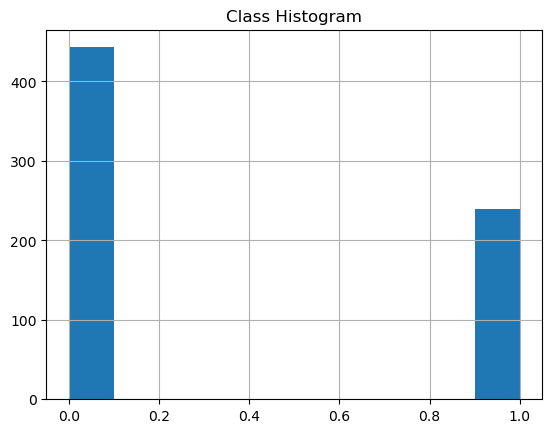

In [12]:
#Selección de data
data['Class'].hist()
plt.title('Class Histogram')

## Partición de datos

In [13]:
from sklearn.model_selection import train_test_split
#Asignamos valores al set de X y al set de Y
X = data[['id_number','Clump_Thickness','Uniformity_of_Cell_Size ','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',"Bland_Chromatin",'Normal_Nucleoli','Mitoses']]
Y = data['Class']
#Dividir el conjunto de datos de introducción y conjuntos de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [14]:
#Impresión final del train data para el set de X
X_train.head()

,id_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
326,756136,1,1,1,1,2,1.0,2,1,1
208,1219406,5,1,1,1,1,1.0,3,1,1
271,320675,3,3,5,2,3,10.0,7,1,1
409,1238021,1,1,1,1,2,1.0,2,1,1
103,1168736,10,10,10,10,10,1.0,8,8,8


In [15]:
#Impresión final del train data para el set de Y
Y_train.head()

326    0.0
208    0.0
271    1.0
409    0.0
103    1.0
Name: Class, dtype: float64

In [16]:
#Revisión de shapes
print('X',X_train.shape)
print('Y',Y_train.shape)

X (545, 10)
Y (545,)


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [18]:
Y_pred_train=rf.predict(X_train)
Y_pred_val=rf.predict(X_test)

In [19]:
sklearn.metrics.confusion_matrix(Y_train, Y_pred_train)

array([[351,   0],
       [  0, 194]])

In [20]:
sklearn.metrics.confusion_matrix(Y_test, Y_pred_val)

array([[90,  2],
       [ 0, 45]])

In [21]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(X_train, Y_train)

KNeighborsClassifier()

In [22]:
Y_pred_train=kn.predict(X_train)
Y_pred_val=kn.predict(X_test)

/Users/FranciscoRivera/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/FranciscoRivera/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

In [23]:
sklearn.metrics.confusion_matrix(Y_train, Y_pred_train)

array([[309,  42],
       [102,  92]])

In [24]:
sklearn.metrics.confusion_matrix(Y_test, Y_pred_val)

array([[72, 20],
       [28, 17]])

In [25]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [26]:
Y_pred_train=lr.predict(X_train)
Y_pred_val=lr.predict(X_test)

In [27]:
sklearn.metrics.confusion_matrix(Y_train, Y_pred_train)

array([[351,   0],
       [194,   0]])

In [28]:
sklearn.metrics.confusion_matrix(Y_test, Y_pred_val)

array([[92,  0],
       [45,  0]])